In [77]:
#importing library
import pandas as pd
import numpy as np
import plotly.express as px
import re
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf

In [78]:
#loading the dataset
df=pd.read_csv('/kaggle/input/ramen-ratings/ramen-ratings.csv')
#showing the dataset
df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [79]:
#getting preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [80]:
#checking null values in the dataset
df.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [81]:
#getting unique values from  a column
df['Top Ten'].unique()

array([nan, '2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9',
       '2016 #7', '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6',
       '2015 #1', '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9',
       '2014 #10', '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1',
       '2013 #2', '2013 #4', '\n', '2013 #9', '2013 #3', '2012 #10',
       '2012 #7', '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1',
       '2012 #2', '2013 #6', '2012 #4'], dtype=object)

In [82]:
df['Top Ten']=df['Top Ten'].replace({'\n':'nan'})

In [83]:
df['IsTopTen']=df['Top Ten'].apply(lambda x:0 if str(x)=='nan' else 1)

In [84]:
df=df.drop('Top Ten',axis=1)

In [85]:
df['Style']=df['Style'].fillna(df['Style'].mode()[0])

In [86]:
df.isna().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
IsTopTen    0
dtype: int64

In [87]:
df

,Review #,Brand,Variety,Style,Country,Stars,IsTopTen
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,0


In [88]:
df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [89]:
df.query('Stars=="Unrated"')

,Review #,Brand,Variety,Style,Country,Stars,IsTopTen
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,0
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,0
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,0


In [90]:
df['Stars']=df['Stars'].replace({'Unrated':np.NaN}).astype(float)
df['Stars']=df['Stars'].fillna(df['Stars'].mean())

In [91]:
ramen_names=df.loc[:,'Variety']

In [92]:
ramen_names

0                               T's Restaurant Tantanmen 
1       Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...
2                           Cup Noodles Chicken Vegetable
3                           GGE Ramen Snack Tomato Flavor
4                                         Singapore Curry
                              ...                        
2575    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
2576                       Oriental Style Instant Noodles
2577                                       Tom Yum Shrimp
2578                                 Tom Yum Chili Flavor
2579                                           Miso Ramen
Name: Variety, Length: 2580, dtype: object

In [93]:
ramen_names

0                               T's Restaurant Tantanmen 
1       Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...
2                           Cup Noodles Chicken Vegetable
3                           GGE Ramen Snack Tomato Flavor
4                                         Singapore Curry
                              ...                        
2575    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
2576                       Oriental Style Instant Noodles
2577                                       Tom Yum Shrimp
2578                                 Tom Yum Chili Flavor
2579                                           Miso Ramen
Name: Variety, Length: 2580, dtype: object

In [94]:
ps=PorterStemmer()
def preprocess_name(name):
    new_name=name.lower() #Make Name Lowercase
    new_name=re.sub(r'[^a-z0-9\s]','',new_name)   #Remove Punctuation
    new_name=re.sub(r'[0-9]+','number',new_name)   #Change numerical number of 'number'
    new_name=new_name.split(" ") #Making string into a list of words
    new_name=list(map(lambda x:ps.stem(x),new_name)) #Stemming each word
    new_name=list(map(lambda x:x.strip(),new_name)) #Removing leading and trailing spaces
    for i in range(len(new_name)):
        if new_name[i]=='flavour':
            new_name[i]='flavor'
    
    if '' in new_name:
        new_name.remove('')
    return new_name
    
    

In [95]:
ramen_names=ramen_names.apply(preprocess_name)

In [96]:
#Getting unique word in list of ramen names


vocabulary=set()

for ramens in ramen_names:
    for ramen in ramens:
        if ramen not in vocabulary:
            vocabulary.add(ramen)
            
vocab_length=len(vocabulary)


print(vocab_length)






#maximum length of single ramen name
max_sequence_length=max(ramen_names.apply(lambda x:len(x)))

print(max_sequence_length)

1373
13


In [102]:
tokenizer=Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(ramen_names)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(ramen_names)

name_features=pad_sequences(sequences,maxlen=max_sequence_length,padding='post')


print(name_features)

[[511 402 324 ...   0   0   0]
 [  1   6  18 ...   0   0   0]
 [  8   1   5 ...   0   0   0]
 ...
 [ 15  23  16 ...   0   0   0]
 [ 15  23  69 ...   0   0   0]
 [ 43   4   0 ...   0   0   0]]


In [104]:
df=df.drop('Variety',axis=1)

In [108]:
df=df.drop(df.columns[0],axis=1)

In [109]:
df

,Brand,Style,Country,Stars,IsTopTen
0,New Touch,Cup,Japan,3.75,0
1,Just Way,Pack,Taiwan,1.00,0
2,Nissin,Cup,USA,2.25,0
3,Wei Lih,Pack,Taiwan,2.75,0
4,Ching's Secret,Pack,India,3.75,0
...,...,...,...,...,...
2575,Vifon,Bowl,Vietnam,3.50,0
2576,Wai Wai,Pack,Thailand,1.00,0
2577,Wai Wai,Pack,Thailand,2.00,0
2578,Wai Wai,Pack,Thailand,2.00,0


In [111]:
df['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

In [112]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [113]:
df=onehot_encode(df,['Brand','Style','Country'])

In [115]:
for column in df.columns:
    if df[column].dtype=='bool':
        df[column]=df[column].astype(int)

In [116]:
df

,Stars,IsTopTen,Brand_1 To 3 Noodles,Brand_7 Select,Brand_7 Select/Nissin,Brand_A-One,Brand_A-Sha Dry Noodle,Brand_A1,Brand_ABC,Brand_Acecook,...,Country_Sarawak,Country_Singapore,Country_South Korea,Country_Sweden,Country_Taiwan,Country_Thailand,Country_UK,Country_USA,Country_United States,Country_Vietnam
0,3.75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2.75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3.75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,3.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2576,1.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2577,2.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2578,2.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [117]:
labels=df.loc[:,'IsTopTen']
other_features=df.drop('IsTopTen',axis=1)

In [119]:
scaler=StandardScaler()
other_features=pd.DataFrame(scaler.fit_transform(other_features),columns=other_features.columns,index=other_features.index)

In [124]:
name_features=pd.Series(list(name_features))

In [125]:
name_features

0           [511, 402, 324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1           [1, 6, 18, 30, 6, 18, 30, 228, 1, 0, 0, 0, 0]
2                [8, 1, 5, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3             [267, 4, 72, 54, 2, 0, 0, 0, 0, 0, 0, 0, 0]
4              [129, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                              ...                        
2575    [365, 700, 215, 510, 442, 443, 22, 100, 22, 0,...
2576            [29, 22, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2577           [15, 23, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2578           [15, 23, 69, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2579             [43, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Length: 2580, dtype: object

In [126]:
features=pd.concat([name_features,other_features],axis=1)
features

,0,Stars,Brand_1 To 3 Noodles,Brand_7 Select,Brand_7 Select/Nissin,Brand_A-One,Brand_A-Sha Dry Noodle,Brand_A1,Brand_ABC,Brand_Acecook,...,Country_Sarawak,Country_Singapore,Country_South Korea,Country_Sweden,Country_Taiwan,Country_Thailand,Country_UK,Country_USA,Country_United States,Country_Vietnam
0,"[511, 402, 324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.093958,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
1,"[1, 6, 18, 30, 6, 18, 30, 228, 1, 0, 0, 0, 0]",-2.616622,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,3.243125,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
2,"[8, 1, 5, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-1.384540,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,2.643410,-0.019691,-0.209020
3,"[267, 4, 72, 54, 2, 0, 0, 0, 0, 0, 0, 0, 0]",-0.891708,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,3.243125,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
4,"[129, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.093958,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,"[365, 700, 215, 510, 442, 443, 22, 100, 22, 0,...",-0.152459,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,4.784233
2576,"[29, 22, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-2.616622,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,3.536644,-0.165768,-0.378299,-0.019691,-0.209020
2577,"[15, 23, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-1.630957,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,3.536644,-0.165768,-0.378299,-0.019691,-0.209020
2578,"[15, 23, 69, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-1.630957,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,3.536644,-0.165768,-0.378299,-0.019691,-0.209020


In [98]:
df

,Review #,Brand,Variety,Style,Country,Stars,IsTopTen
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,0


In [127]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,train_size=0.7,random_state=123)

In [129]:
x_test

,0,Stars,Brand_1 To 3 Noodles,Brand_7 Select,Brand_7 Select/Nissin,Brand_A-One,Brand_A-Sha Dry Noodle,Brand_A1,Brand_ABC,Brand_Acecook,...,Country_Sarawak,Country_Singapore,Country_South Korea,Country_Sweden,Country_Taiwan,Country_Thailand,Country_UK,Country_USA,Country_United States,Country_Vietnam
263,"[3, 20, 1, 16, 15, 23, 2, 80, 0, 0, 0, 0, 0]",0.340374,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,3.536644,-0.165768,-0.378299,-0.019691,-0.209020
2427,"[16, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-1.877373,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,2.643410,-0.019691,-0.209020
1265,"[5, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.891708,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,6.032521,-0.378299,-0.019691,-0.209020
417,"[864, 865, 403, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.340374,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
2463,"[1351, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.340374,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,2.710999,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,"[42, 11, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.586790,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
2148,"[3, 70, 204, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-1.138124,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,3.243125,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
2472,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-1.630957,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,2.643410,-0.019691,-0.209020
1870,"[74, 88, 152, 174, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.891708,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,4.784233


# Modeling and Training

In [130]:
features.shape

(2580, 402)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


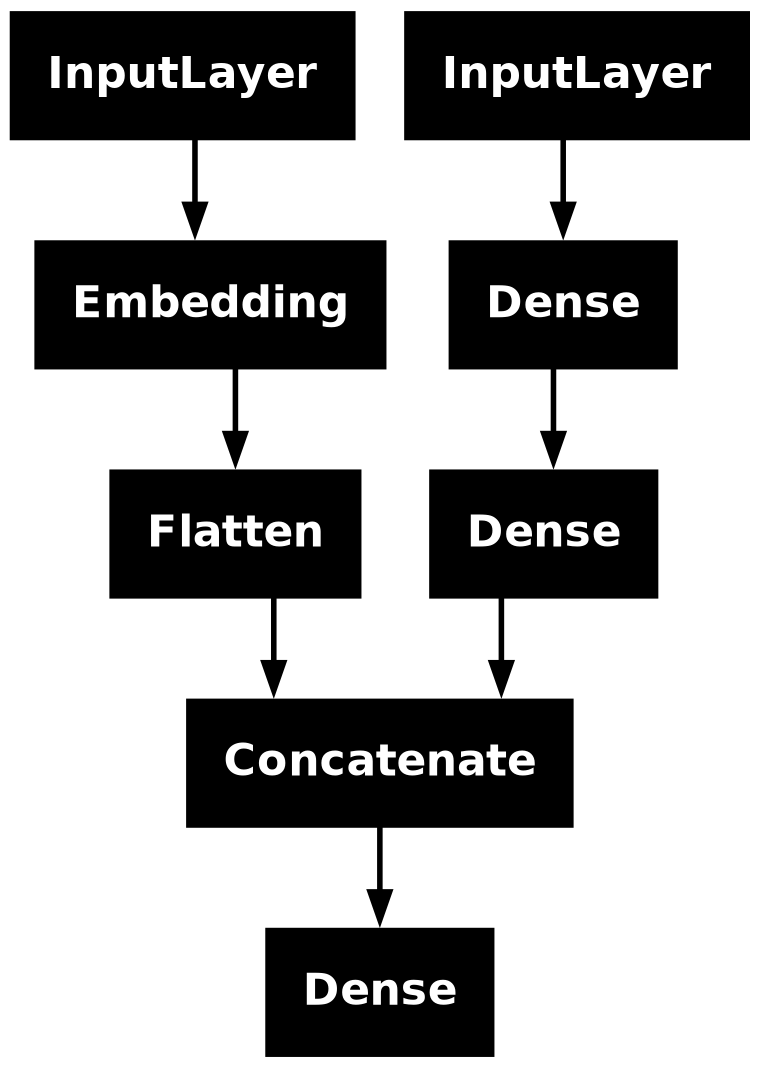

In [132]:
embedding_dim=64
#Training the Name features
name_inputs=tf.keras.Input(shape=(13,),name='name_inputs')
#Training on other features

name_embedding=tf.keras.layers.Embedding(
        input_dim=vocab_length,
        output_dim=embedding_dim,
        input_length=max_sequence_length,
        name='name_embedding'
)(name_inputs)


name_outputs=tf.keras.layers.Flatten(name='name_flatten')(name_embedding)




other_inputs=tf.keras.Input(shape=(401,),name='other_inputs')


hidden=tf.keras.layers.Dense(64,activation='relu',name='dense_1')(other_inputs)
other_outputs=tf.keras.layers.Dense(64,activation='relu',name='dense_2')(hidden)
concat=tf.keras.layers.concatenate([name_outputs,other_outputs],name='concatenate')
outputs=tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer')(concat)


model=tf.keras.Model(inputs=[name_inputs,other_inputs],outputs=outputs)

tf.keras.utils.plot_model(model)









In [133]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ name_inputs         │ (None, 13)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ other_inputs        │ (None, 401)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_embedding      │ (None, 13, 64)    │     87,872 │ name_inputs[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │     25,728 │ other_inputs[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_flatten        │ (None, 832)       │          0 │ name_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      4,160 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 896)       │          0 │ name_flatten[0][… │
│ (Concatenate)       │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 1)         │        897 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 118,657 (463.50 KB)

 Trainable params: 118,657 (463.50 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
x_train_1=np.stack(x_train[0].to_numpy())

In [151]:
x_test_1=np.stack(x_test[0].to_numpy())
x_test_2=x_test.drop(0,axis=1)

In [137]:
x_train_2=x_train.drop(0,axis=1)

In [139]:
x_train_2

,Stars,Brand_1 To 3 Noodles,Brand_7 Select,Brand_7 Select/Nissin,Brand_A-One,Brand_A-Sha Dry Noodle,Brand_A1,Brand_ABC,Brand_Acecook,Brand_Adabi,...,Country_Sarawak,Country_Singapore,Country_South Korea,Country_Sweden,Country_Taiwan,Country_Thailand,Country_UK,Country_USA,Country_United States,Country_Vietnam
970,-0.645291,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,-0.039406,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,4.784233
1206,-0.398875,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,-0.039406,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
1173,1.326039,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,-0.039406,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,2.643410,-0.019691,-0.209020
2030,0.586790,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,-0.039406,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
1643,0.093958,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,-0.039406,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,3.536644,-0.165768,-0.378299,-0.019691,-0.209020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0.093958,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,-0.039406,...,-0.03412,4.761273,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
2154,-0.645291,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,-0.039406,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,4.784233
1766,-0.152459,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,-0.039406,...,-0.03412,-0.210028,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020
1122,0.093958,-0.019691,-0.027853,-0.019691,-0.039406,-0.100897,-0.03412,-0.068359,-0.076472,-0.039406,...,-0.03412,4.761273,-0.368868,-0.03412,-0.308345,-0.282754,-0.165768,-0.378299,-0.019691,-0.209020


In [142]:
x_train_1.shape

(1805, 13)

In [144]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
batch_size=64
epochs=100
history=model.fit([x_train_1,x_train_2],y_train,validation_split=0.2,batch_size=batch_size,epochs=epochs,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],verbose=2)

Epoch 1/100
23/23 - 2s - 81ms/step - accuracy: 0.9501 - auc: 0.5786 - loss: 0.2658 - val_accuracy: 0.9889 - val_auc: 0.6155 - val_loss: 0.0647 - learning_rate: 0.0010
Epoch 2/100
23/23 - 0s - 5ms/step - accuracy: 0.9848 - auc: 0.6347 - loss: 0.0796 - val_accuracy: 0.9889 - val_auc: 0.6723 - val_loss: 0.0599 - learning_rate: 0.0010
Epoch 3/100
23/23 - 0s - 6ms/step - accuracy: 0.9848 - auc: 0.7373 - loss: 0.0743 - val_accuracy: 0.9889 - val_auc: 0.6499 - val_loss: 0.0585 - learning_rate: 0.0010
Epoch 4/100
23/23 - 0s - 5ms/step - accuracy: 0.9848 - auc: 0.8796 - loss: 0.0664 - val_accuracy: 0.9889 - val_auc: 0.7549 - val_loss: 0.0583 - learning_rate: 0.0010
Epoch 5/100
23/23 - 0s - 5ms/step - accuracy: 0.9848 - auc: 0.9411 - loss: 0.0604 - val_accuracy: 0.9889 - val_auc: 0.7475 - val_loss: 0.0573 - learning_rate: 0.0010
Epoch 6/100
23/23 - 0s - 6ms/step - accuracy: 0.9848 - auc: 0.9688 - loss: 0.0541 - val_accuracy: 0.9889 - val_auc: 0.7528 - val_loss: 0.0581 - learning_rate: 0.0010
Epo

In [148]:
fig=px.line(history.history,y=['loss','val_loss'],labels={'x':'Epochs','y':'Loss'},title='Loss Over Time')

fig.show()


In [152]:
results=model.evaluate([x_test_1,x_test_2],y_test)
print(results)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9814 - auc: 0.5873 - loss: 0.0886     
[0.09334349632263184, 0.9819355010986328, 0.63761305809021]
